In [98]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [99]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [100]:
X_train.shape

(60000, 28, 28)

In [101]:
import matplotlib.pyplot as plt

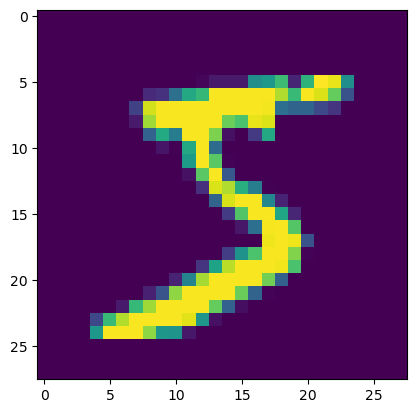

In [102]:
plt.imshow(X_train[0])

In [103]:
X_train=X_train/255
X_test=X_test/255

In [170]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))

C:\Users\imtia\.conda\envs\quant\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [172]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [174]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8583 - loss: 0.4935 - val_accuracy: 0.9573 - val_loss: 0.1423
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9644 - loss: 0.1203 - val_accuracy: 0.9553 - val_loss: 0.1432
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9741 - loss: 0.0811 - val_accuracy: 0.9690 - val_loss: 0.1024
Epoch 4/25
1474/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9818 - loss: 0.0607

In [160]:
y_prob=model.predict(X_test)
y_pred=y_prob.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step


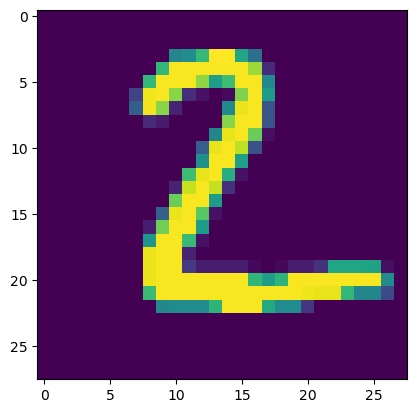

In [162]:
plt.imshow(X_test[1])

In [166]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9553

In [168]:
history.history

{'accuracy': [0.729645848274231,
  0.905958354473114,
  0.9332708120346069,
  0.9463958144187927,
  0.9559791684150696,
  0.9621666669845581,
  0.9678541421890259,
  0.971916675567627,
  0.9750833511352539,
  0.9791250228881836,
  0.9810208082199097,
  0.9833750128746033,
  0.9858750104904175,
  0.9879583120346069,
  0.9889583587646484,
  0.9903958439826965,
  0.9915624856948853,
  0.9928125143051147,
  0.9930416941642761,
  0.9932916760444641,
  0.9933750033378601,
  0.9942499995231628,
  0.9948124885559082,
  0.9938333630561829,
  0.9956666827201843],
 'loss': [0.9070685505867004,
  0.39205655455589294,
  0.2809746563434601,
  0.221771240234375,
  0.181319922208786,
  0.15340249240398407,
  0.12988024950027466,
  0.10885638743638992,
  0.09598269313573837,
  0.08176267892122269,
  0.07155820727348328,
  0.0621943399310112,
  0.05345862731337547,
  0.046591866761446,
  0.04231424629688263,
  0.03696765750646591,
  0.032613180577754974,
  0.029985805973410606,
  0.02719651348888874,
  

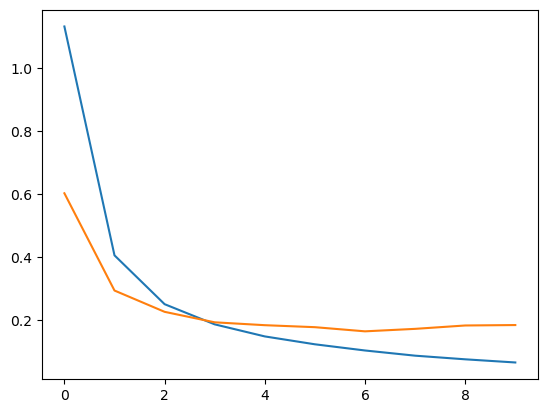

In [148]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

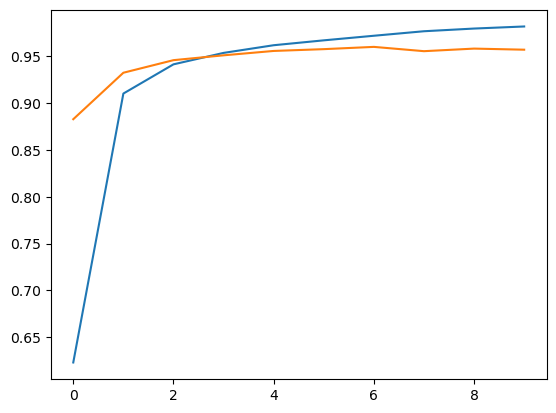

In [150]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])